In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score,cohen_kappa_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
import time

In [2]:
data=pd.read_csv('/Users/nirunaya/Downloads/data.csv', delimiter=',')
P=data.iloc[:,2:32]

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())

(569, 11)
[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.9602558201892891


In [6]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=data.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column

In [7]:
yd=pd.get_dummies(data.diagnosis)
y=yd.M
y.head(20) # response variable

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: M, dtype: uint8

In [8]:
Xy=pd.DataFrame(np.hstack([P_pca,d.values]),columns=n)
from sklearn.model_selection import train_test_split
#predictor X
X=(Xy.iloc[:,0:11]).values
print(type(X))
X=pd.DataFrame(X).values
print(type(X))
print(np.histogram(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(array([  56,  257, 1435, 3784,  516,  139,   42,   15,    9,    6]), array([-5.64240058686511, -3.9336946481499506, -2.2249887094347915,
       -0.5162827707196325, 1.1924231679955266, 2.9011291067106857,
       4.609835045425845, 6.318540984141004, 8.027246922856163,
       9.735952861571322, 11.444658800286483], dtype=object))


In [9]:
#X.head()

In [10]:
#y.head()
#print(type(y))
#y=y.values
#print(type(y))

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
svm = SVC()
t0=time.time()
svm.fit(X_train, y_train)
training_time=round(time.time()-t0,3)
t1=time.time()
prediction = svm.predict(X_test)
prediction_time=round(time.time()-t1,3)
print('predection time is : {:.3f}'.format(prediction_time))
print('training time is : {:.3f}'.format(training_time))
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

predection time is : 0.001
training time is : 0.006
The accuracy on the training subset: 0.986
The accuracy on the test subset: 0.972


/Users/nirunaya/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
#print(type(y))
#print(type(X))
#print(X)
y=y.values

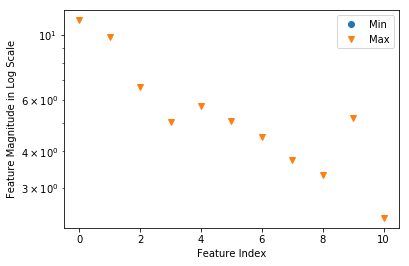

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

SVM:
 confusion matrix
 [[90  0]
 [ 4 49]] 


Confusion matrix plot of SVM classifier


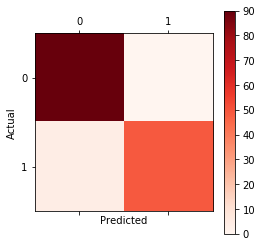


 Classification report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

   micro avg       0.97      0.97      0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

With svm accuracy is:  0.972027972027972


In [17]:
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, prediction)
print('SVM:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of SVM classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test,prediction))
print('With svm accuracy is: ',svm.score(X_test,y_test)) # accuracy


In [18]:
#import metrics for evaluation

from sklearn.metrics import accuracy_score,cohen_kappa_score, f1_score, recall_score, precision_score

#use builtin functions or use confustion matrix

#[row, column] from confustion matrix
# TP - True positive, TN - True Negative, FP - False Positive, FN - False Negative

TP = c_m[1, 1]
TN = c_m[0, 0]
FP = c_m[0, 1]
FN = c_m[1, 0]

In [19]:
cohen_kappa_score(y_test, prediction, labels=None, weights=None, sample_weight=None)

0.9390971039182283

In [20]:
f1_score(y_test, prediction, labels=None)

0.9607843137254902

In [21]:
#accuracy score - 2 ways (1- using metrics functions or 2-using confusion matrix)

print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, prediction))

0.972027972027972
0.972027972027972


In [22]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_test, prediction))

0.027972027972027972
0.027972027972028024


In [23]:
#sensitivity - 2 ways

sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, prediction))


0.9245283018867925
0.9245283018867925


In [24]:
#specificity

specificity = TN / (TN + FP)
print(specificity)

1.0


In [25]:
#precision

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, prediction))

1.0
1.0


In [26]:
#false positive rate

false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.0
0.0


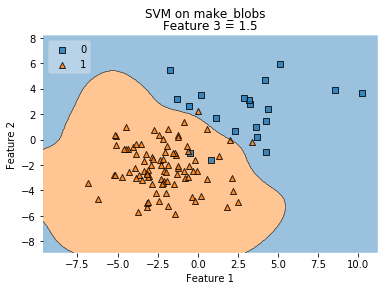

In [6]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt



# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75
plot_decision_regions(X, y, clf=svm,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
fig.suptitle('SVM on make_blobs')
plt.show()